In [18]:
import sys, os, array, time
import numpy as np
import matplotlib.pyplot as plt
import IPython

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dropout,Dense
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.gen_array_ops import mirror_pad_eager_fallback
from PIL import Image
import PIL.ImageOps  
import cv2
from sklearn.utils import shuffle

from keras.preprocessing.image import ImageDataGenerator

In [110]:
model=tf.keras.models.load_model("model.h5")
x_test=np.load("x_test.npy")
y_test=np.load("y_test.npy")
model.trainable = False
image=x_test[6].reshape(-1,64,64,3)
image_probs = model.predict(image)

print(image_probs.shape)

1/1 [==============================] - 0s 101ms/step
(1, 4)


In [111]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad


(1, 64, 64, 3)
(1, 4)


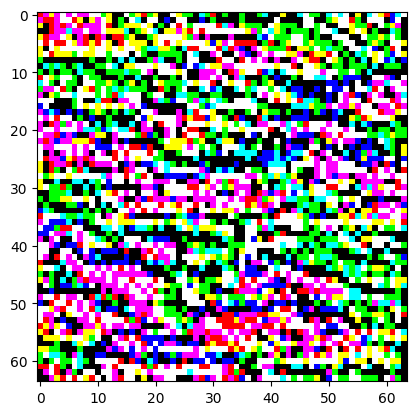

In [112]:
index = 6
label = tf.one_hot(index,image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

print(image.shape)
image=tf.convert_to_tensor(image)
perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]
print(label.shape)


In [113]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

tf.Tensor([[4.1734071e-17 8.3648081e-14 1.0000000e+00 3.8885138e-14]], shape=(1, 4), dtype=float32)


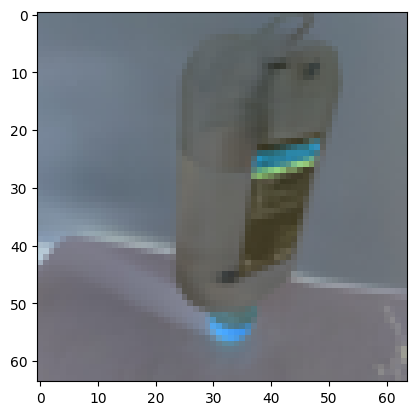

In [122]:
epsilons = [0.]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  plt.imshow(adv_x[0])
  print(model(adv_x))